<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/main/Classification_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#import janitor

from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.naive_bayes import  GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix



Naive bayes

In [3]:
X,y = make_blobs(n_samples=100,n_features=2,centers=2,random_state = 2, cluster_std = 1.5)

Plot a scatter plot to see the distribution

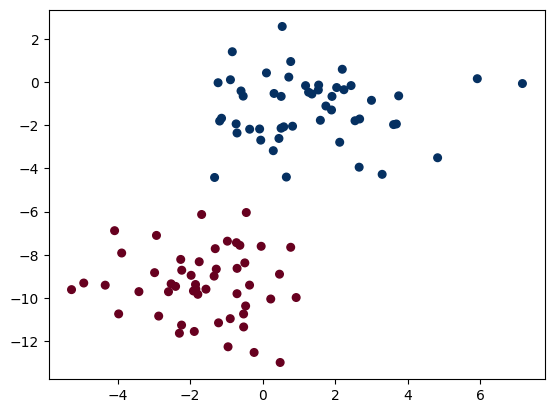

In [19]:
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='RdBu')

Leave parameters as default

array([0])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.20,random_state=42 )

In [34]:
#For Gaussian leave the parameters as default
nb_model = GaussianNB()a

In [35]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [36]:
nb_preds = nb_model.predict(X_test)

In [37]:
def metrics(y_test, preds):

    print(accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

In [38]:
xmetrics(y_test,nb_preds)

0.9875
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.97      0.99        40

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

[[40  0]
 [ 1 39]]


In [47]:
rng=np.random.RandomState(0)
rng

RandomState(MT19937) at 0x7A546613D840

In [51]:
rng.rand(2000,2)

array([[0.4577597 , 0.3769177 ],
       [0.70233513, 0.20732411],
       [0.07427954, 0.36602663],
       ...,
       [0.93920216, 0.4984804 ],
       [0.12176172, 0.84348096],
       [0.94290928, 0.83282242]])

In [49]:
Xnew = [-6 ,-14] + [14,18]*rng.rand(2000,2)

In [52]:
ynew = nb_model.predict(Xnew)

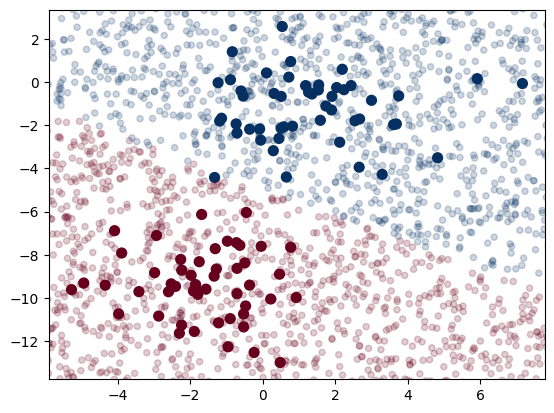

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.2)
plt.axis(lim);

In [57]:
yprob = nb_model.predict_proba(Xnew)
yprob.round(2)

array([[0.52, 0.48],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [58]:
Xnew[0]

array([-1.9030113 , -3.80267106])

Stochastic Gradient Discent

In [81]:
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

In [72]:
bc = datasets.load_breast_cancer()

In [75]:
X = bc['data']
y = bc['target']


In [78]:
df = pd.DataFrame(X,columns=bc.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.33,random_state=42 )

In [93]:
sgd_model = SGDClassifier(loss='log_loss')

In [94]:
sgd_model.fit(X_train,y_train)

SGDClassifier(loss='log_loss')

In [96]:
sgd_preds = sgd_model.predict(X_test)

In [95]:
def metrics(y_test, preds):

    print(accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

In [97]:
metrics(y_test,sgd_preds)

0.9450261780104712
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       136
           1       0.94      0.98      0.96       246

    accuracy                           0.95       382
   macro avg       0.95      0.93      0.94       382
weighted avg       0.95      0.95      0.94       382

[[121  15]
 [  6 240]]


K Nearest Neighbours Algorithm

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [98]:
df = pd.read_csv('Social_Network_Ads.csv')

In [99]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [101]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [102]:
gender = pd.get_dummies(df['Gender'],drop_first=True,dtype='int')

In [109]:
df = pd.concat([df,gender],axis=1).drop(['Gender'],axis=1)

In [110]:
df

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [112]:
X=df[['Age','EstimatedSalary','Male']]
y=df['Purchased']

In [114]:
st = StandardScaler()

In [115]:
X_scaled = st.fit_transform(X)

In [118]:
knn_model = KNeighborsClassifier()

In [119]:
knn_model.fit(X_scaled,y)

KNeighborsClassifier()

In [125]:
#Let's take a new point and predict its output class
knn_model.predict(np.array([40, 50000, 0]).reshape(-1,3))

array([1])

Decision Trees

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [126]:
df = pd.read_csv('balance-scale.data')

In [127]:
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left weight     625 non-null    int64 
 2   Left distance   625 non-null    int64 
 3   Right weight    625 non-null    int64 
 4   Right distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [141]:
df.shape

(625, 5)

In [129]:
df['Class Name'].value_counts()

R    288
L    288
B     49
Name: Class Name, dtype: int64

In [133]:
X=df.drop(['Class Name'],axis=1)
y = df['Class Name']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.33,random_state=42 )

In [136]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [139]:
dt_preds=dt_model.predict(X_test)

In [140]:
metrics(y_test,dt_preds)

0.7780429594272077
              precision    recall  f1-score   support

           B       0.06      0.06      0.06        32
           L       0.84      0.82      0.83       189
           R       0.84      0.85      0.85       198

    accuracy                           0.78       419
   macro avg       0.58      0.58      0.58       419
weighted avg       0.78      0.78      0.78       419

[[  2  14  16]
 [ 18 155  16]
 [ 14  15 169]]


In [147]:
r = export_text(dt_model, feature_names=list(X.columns))
print(r)

|--- Left weight <= 3.50
|   |--- Right distance <= 2.50
|   |   |--- Right weight <= 2.50
|   |   |   |--- Left distance <= 2.50
|   |   |   |   |--- Right weight <= 1.50
|   |   |   |   |   |--- Left weight <= 1.50
|   |   |   |   |   |   |--- class: R
|   |   |   |   |   |--- Left weight >  1.50
|   |   |   |   |   |   |--- class: L
|   |   |   |   |--- Right weight >  1.50
|   |   |   |   |   |--- class: B
|   |   |   |--- Left distance >  2.50
|   |   |   |   |--- class: L
|   |   |--- Right weight >  2.50
|   |   |   |--- Left weight <= 2.50
|   |   |   |   |--- Left distance <= 4.50
|   |   |   |   |   |--- Right weight <= 3.50
|   |   |   |   |   |   |--- Right distance <= 1.50
|   |   |   |   |   |   |   |--- Left distance <= 3.00
|   |   |   |   |   |   |   |   |--- Left weight <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: R
|   |   |   |   |   |   |   |   |--- Left weight >  1.50
|   |   |   |   |   |   |   |   |   |--- class: L
|   |   |   |   |   |   |   |--- Lef

In [142]:
#We are building another tree model with some parameters to potentially
#help with overfitting.
clf_model = DecisionTreeClassifier(criterion="gini",random_state=42,
                                   max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [143]:
preds = clf_model.predict(X_test)

In [144]:
metrics(y_test, preds)

0.7040572792362768
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        32
           L       0.76      0.64      0.69       189
           R       0.67      0.88      0.76       198

    accuracy                           0.70       419
   macro avg       0.48      0.51      0.48       419
weighted avg       0.66      0.70      0.67       419

[[  0  15  17]
 [  0 121  68]
 [  0  24 174]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
r = export_text(clf_model, feature_names=list(X.columns))
print(r)

|--- Left weight <= 3.50
|   |--- Right distance <= 2.50
|   |   |--- Right weight <= 2.50
|   |   |   |--- class: L
|   |   |--- Right weight >  2.50
|   |   |   |--- class: R
|   |--- Right distance >  2.50
|   |   |--- Right weight <= 2.50
|   |   |   |--- class: R
|   |   |--- Right weight >  2.50
|   |   |   |--- class: R
|--- Left weight >  3.50
|   |--- Left distance <= 2.50
|   |   |--- Right distance <= 2.50
|   |   |   |--- class: L
|   |   |--- Right distance >  2.50
|   |   |   |--- class: R
|   |--- Left distance >  2.50
|   |   |--- Right weight <= 4.50
|   |   |   |--- class: L
|   |   |--- Right weight >  4.50
|   |   |   |--- class: L



Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rf_model = RandomForestClassifier()

In [152]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [153]:
preds = rf_model.predict(X_test)

In [154]:
metrics(y_test, preds)

0.8257756563245824
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        32
           L       0.83      0.90      0.86       189
           R       0.87      0.88      0.87       198

    accuracy                           0.83       419
   macro avg       0.56      0.60      0.58       419
weighted avg       0.78      0.83      0.80       419

[[  0  18  14]
 [  5 171  13]
 [  5  18 175]]
